In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.pipeline import Pipeline

In [124]:
col_names = [ 
 'age'
,'workclass'
,'fnlwgt'
,'education'
,'education-num'
,'marital-status'
,'occupation'
,'relationship'
,'race'
,'sex'
,'capital-gain'
,'capital-loss'
,'hours-per-week'
,'native-country'
,'annual_income'
]
df = pd.read_csv('adult_data_first.csv', names = col_names,na_values = ' ?')
df['annual_income'] = df['annual_income'].str.replace('.','')

In [125]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [126]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [127]:
df.du.unique()

AttributeError: 'DataFrame' object has no attribute 'du'

In [128]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
annual_income        0
dtype: int64

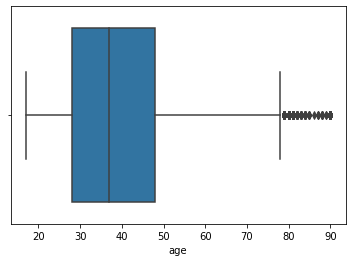

In [129]:
sns.boxplot(x = df['age'],orient = 'horizontal')

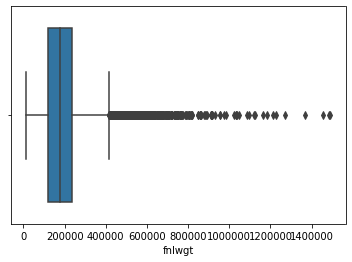

In [130]:
sns.boxplot(x = df['fnlwgt'])


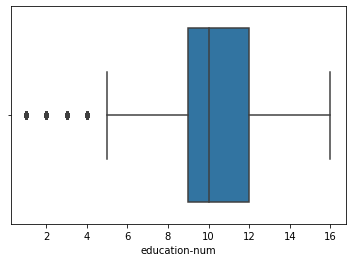

In [131]:
sns.boxplot(x = df['education-num'])

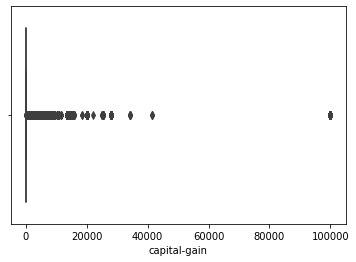

In [132]:
sns.boxplot(x = df['capital-gain'])

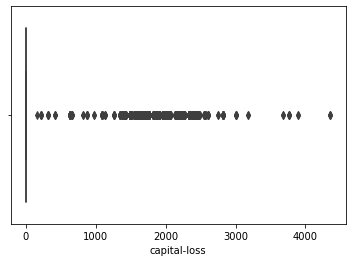

In [133]:
sns.boxplot(x = df['capital-loss'])

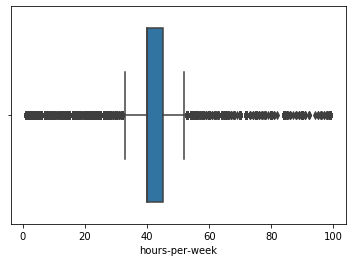

In [134]:
sns.boxplot(x = df['hours-per-week'])

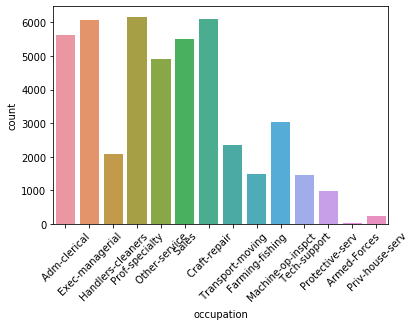

In [135]:

sns.countplot(x = df['occupation'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

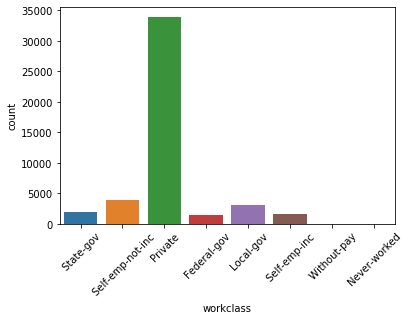

In [136]:
sns.countplot(x = df['workclass'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

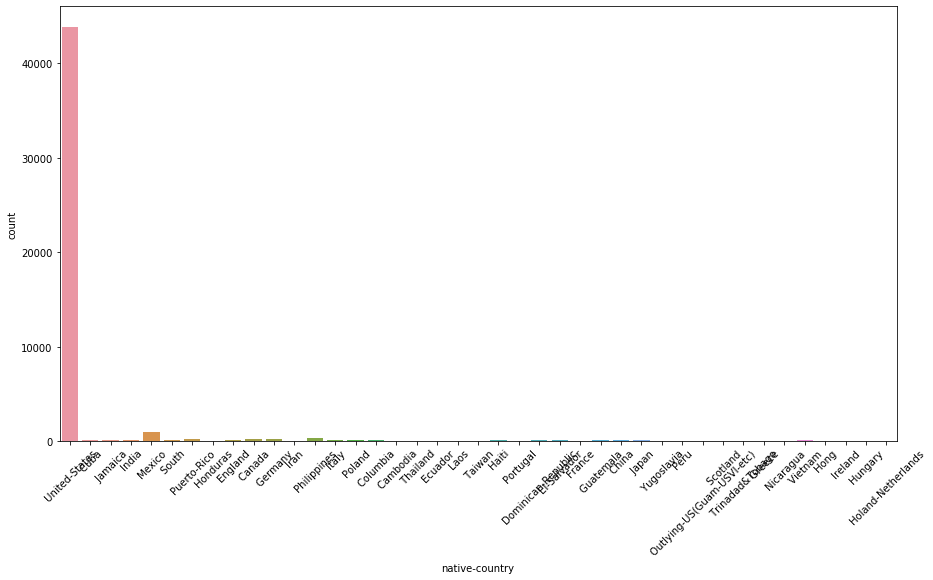

In [137]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['native-country'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [138]:
df = df[df['occupation'].notna()]
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    811
annual_income       0
dtype: int64

In [139]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

C:\Users\Ali\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [140]:
df[df.duplicated() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [141]:
df.fillna(df.mode(),inplace = True)
df.drop(["education"], axis = 1, inplace = True)
df.isnull().sum()

C:\Users\Ali\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\Ali\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [142]:
df.count().unique()
df.drop_duplicates(inplace = True)

C:\Users\Ali\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
df.groupby('annual_income').agg({'max','min'})


age         workclass                 fnlwgt         \
              max min           max           min      max    min   
annual_income                                                       
 <=50K         90  17   Without-pay   Federal-gov  1490400  13492   
 >50K          90  19   Without-pay   Federal-gov  1226583  13769   

              education-num     marital-status             ...    sex  \
                        max min            max        min  ...    max   
annual_income                                              ...          
 <=50K                   16   1        Widowed   Divorced  ...   Male   
 >50K                    16   1        Widowed   Divorced  ...   Male   

                       capital-gain     capital-loss     hours-per-week      \
                   min          max min          max min            max min   
annual_income                                                                 
 <=50K          Female        41310   0         4356   0             99   1   
 >50K           Female        99999   0         3683   0             99   1   

              native-country             
                         max        min  
annual_income                            
 <=50K            Yugoslavia   Cambodia  
 >50K             Yugoslavia   Cambodia  

[2 rows x 26 columns]

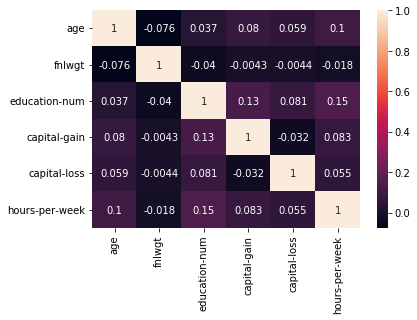

In [144]:
sns.heatmap(df.corr(), annot=True)

In [145]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
count,45985.000000,45985,4.598500e+04,45985.000000,45985,45985,45985,45985,45985,45985.000000,45985.000000,45985.000000,45985,45985
unique,NaN,7,NaN,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33860,NaN,NaN,21438,6165,18992,39400,31081,NaN,NaN,NaN,42066,34569
mean,38.564880,NaN,1.898102e+05,10.129803,NaN,NaN,NaN,NaN,NaN,1115.495814,88.821964,40.952854,NaN,NaN
std,13.201852,NaN,1.054885e+05,2.562978,NaN,NaN,NaN,NaN,NaN,7593.446168,405.518277,12.011417,NaN,NaN
min,17.000000,NaN,1.349200e+04,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176060e+05,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783530e+05,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.378190e+05,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [146]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [147]:
technique = OneHotEncoder(sparse=False,
                          drop=None,
                          categories='auto',
                          handle_unknown='error')

new_dataframe_1 = pd.DataFrame(technique.fit_transform(df[['workclass']]), 
columns=technique.categories_)
new_dataframe_2 = pd.DataFrame(technique.fit_transform(df[['occupation']]), 
columns=technique.categories_)
new_dataframe_3 = pd.DataFrame(technique.fit_transform(df[['relationship']]), 
columns=technique.categories_)
new_dataframe_4 = pd.DataFrame(technique.fit_transform(df[['race']]), 
columns=technique.categories_)
new_dataframe_5 = pd.DataFrame(technique.fit_transform(df[['sex']]), 
columns=technique.categories_)
new_dataframe_6 = pd.DataFrame(technique.fit_transform(df[['native-country']]), 
columns=technique.categories_)
new_dataframe_7 = pd.DataFrame(technique.fit_transform(df[['marital-status']]), 
columns=technique.categories_)



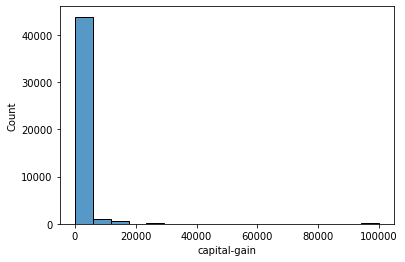

In [148]:

sns.histplot(df['capital-gain'])


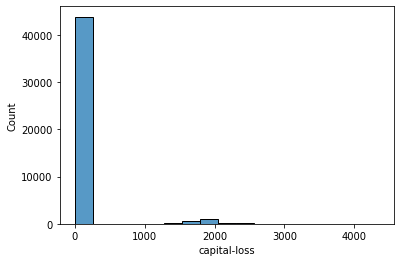

In [149]:
sns.histplot(df['capital-loss'])

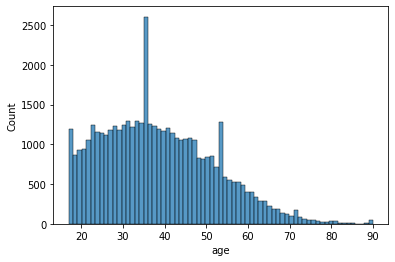

In [150]:
sns.histplot(df['age'])


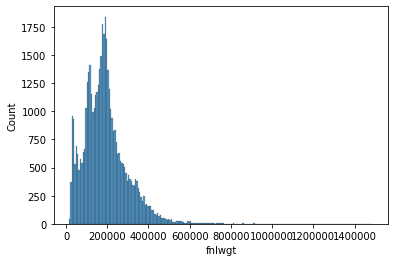

In [151]:
sns.histplot(df['fnlwgt'])

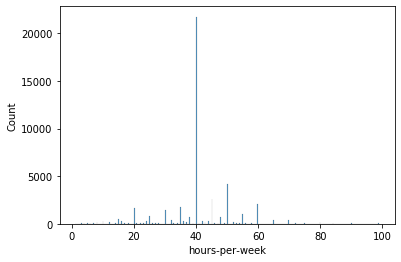

In [152]:
sns.histplot(df['hours-per-week'])


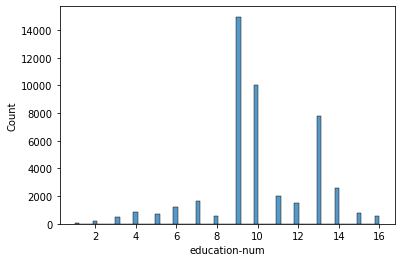

In [153]:
sns.histplot(df['education-num'])

In [154]:
df.reset_index(drop=True, inplace=True)
new_dataframe_1.reset_index(drop=True, inplace=True)
new_dataframe_2.reset_index(drop=True, inplace=True)
new_dataframe_3.reset_index(drop=True, inplace=True)
new_dataframe_4.reset_index(drop=True, inplace=True)
new_dataframe_5.reset_index(drop=True, inplace=True)
new_dataframe_6.reset_index(drop=True, inplace=True)
new_dataframe_7.reset_index(drop=True, inplace=True)

In [155]:
final_df = df.join(new_dataframe_1)
final_df = final_df.join(new_dataframe_2)
final_df = final_df.join(new_dataframe_3)
final_df = final_df.join(new_dataframe_4)
final_df = final_df.join(new_dataframe_5)
final_df = final_df.join(new_dataframe_6)
final_df = final_df.join(new_dataframe_7)

In [156]:
final_df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,"( United-States,)","( Vietnam,)","( Yugoslavia,)","( Divorced,)","( Married-AF-spouse,)","( Married-civ-spouse,)","( Married-spouse-absent,)","( Never-married,)","( Separated,)","( Widowed,)"
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,33,Private,245211,13,Never-married,Prof-specialty,Own-child,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45981,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45982,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45983,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
label = LabelEncoder()
final_df['annual_income_index'] = label.fit(df['annual_income']).transform(df['annual_income'])

In [158]:
df_features = final_df.drop(['workclass','marital-status','occupation','relationship','race','sex','native-country','annual_income'],axis=1)
list(df_features.columns)
feature_cols = ['age',
 'education-num',
 'hours-per-week',
 (' Female',),
 (' Male',),
 (' Federal-gov',),
 (' Local-gov',),
 (' Private',),
 (' Self-emp-inc',),
 (' Self-emp-not-inc',),
 (' State-gov',),
 (' Without-pay',),
 (' Divorced',),
 (' Married-AF-spouse',),
 (' Married-civ-spouse',),
 (' Married-spouse-absent',),
 (' Never-married',),
 (' Separated',),
 (' Widowed',),
 (' Adm-clerical',),
 (' Armed-Forces',),
 (' Craft-repair',),
 (' Exec-managerial',),
 (' Farming-fishing',),
 (' Handlers-cleaners',),
 (' Machine-op-inspct',),
 (' Other-service',),
 (' Priv-house-serv',),
 (' Prof-specialty',),
 (' Protective-serv',),
 (' Sales',),
 (' Tech-support',),
 (' Transport-moving',),
 (' Husband',),
 (' Not-in-family',),
 (' Other-relative',),
 (' Own-child',),
 (' Unmarried',),
 (' Wife',),
 (' Amer-Indian-Eskimo',),
 (' Asian-Pac-Islander',),
 (' Black',),
 (' Other',),
 (' White',),
 (' Cambodia',),
 (' Canada',),
 (' China',),
 (' Columbia',),
 (' Cuba',),
 (' Dominican-Republic',),
 (' Ecuador',),
 (' El-Salvador',),
 (' England',),
 (' France',),
 (' Germany',),
 (' Greece',),
 (' Guatemala',),
 (' Haiti',),
 (' Holand-Netherlands',),
 (' Honduras',),
 (' Hong',),
 (' Hungary',),
 (' India',),
 (' Iran',),
 (' Ireland',),
 (' Italy',),
 (' Jamaica',),
 (' Japan',),
 (' Laos',),
 (' Mexico',),
 (' Nicaragua',),
 (' Outlying-US(Guam-USVI-etc)',),
 (' Peru',),
 (' Philippines',),
 (' Poland',),
 (' Portugal',),
 (' Puerto-Rico',),
 (' Scotland',),
 (' South',),
 (' Taiwan',),
 (' Thailand',),
 (' Trinadad&Tobago',),
 (' United-States',),
 (' Vietnam',),
 (' Yugoslavia',)
]

In [173]:
x = final_df[feature_cols]
y = final_df['annual_income_index']
x_train,x_test,y_train,y_test=train_test_split(StandardScaler(with_mean=True).fit_transform(x),y,test_size=0.30,random_state=0)


In [163]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)


y_pred=logreg.predict(x_test)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [172]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8303856190200058
Precision: 0.6849217638691323
Recall: 0.5698224852071005


AxesSubplot(0.125,0.125;0.62x0.755)


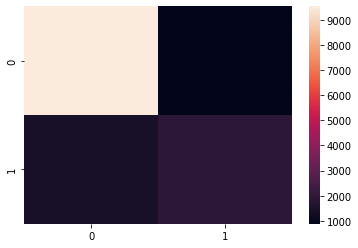

In [189]:
metrics.confusion_matrix(y_test, y_pred)
print(sns.heatmap(metrics.confusion_matrix(y_test, y_pred, labels=[0,1])))

In [190]:

y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred, name='Predicted')

#create confusion matrix
print(pd.crosstab(y_actual, y_predicted))

Predicted     0    1
Actual              
0          2514  620
1           815  198


In [33]:
result = sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Square Error is: ',result)

Root Mean Square Error is:  0.4126339103657907


In [35]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


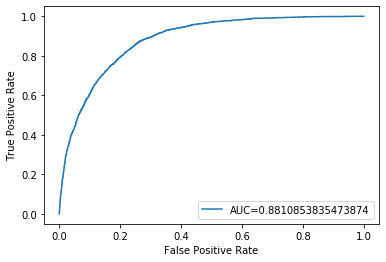

In [36]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [41]:
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(20)

,Attribute,Importance
14,"( Married-civ-spouse,)",0.798079
1,education-num,0.722769
0,age,0.391487
2,hours-per-week,0.360597
22,"( Exec-managerial,)",0.265022
34,"( Not-in-family,)",0.223455
28,"( Prof-specialty,)",0.205290
38,"( Wife,)",0.195859
4,"( Male,)",0.181652
5,"( Federal-gov,)",0.099712


In [43]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [44]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(x_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, r

In [45]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.8308739090560777


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1274 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2474 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 4074 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 38.8min finished


LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy - : 0.831


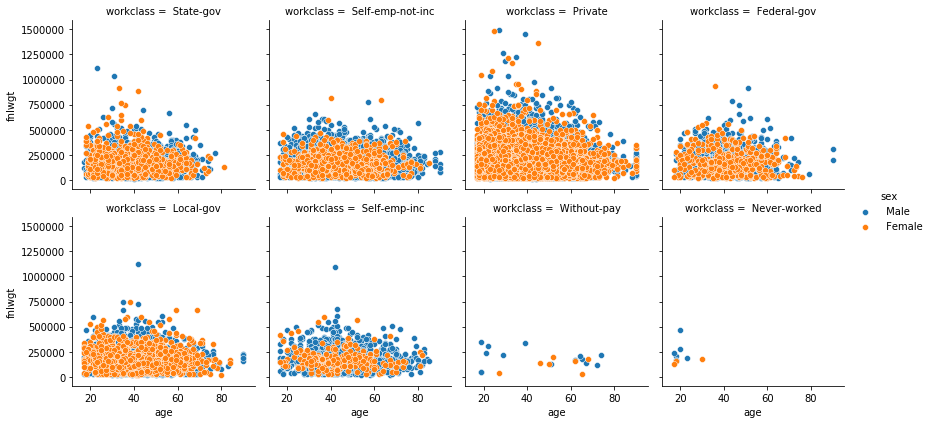

In [32]:
grid = sns.FacetGrid(df, col = "workclass", hue = "sex", col_wrap=4)
grid.map(sns.scatterplot, "age", "fnlwgt")

grid.add_legend()

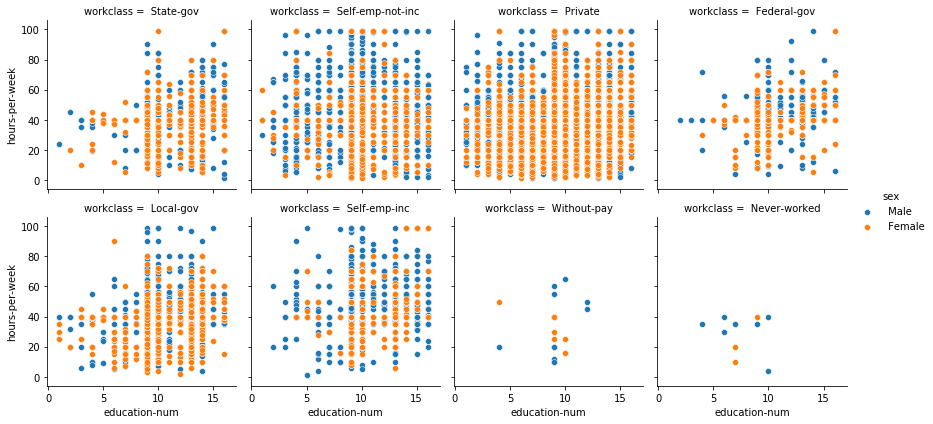

In [33]:
grid = sns.FacetGrid(df, col = "workclass", hue = "sex", col_wrap=4)
grid.map(sns.scatterplot, "education-num", "hours-per-week")

grid.add_legend()

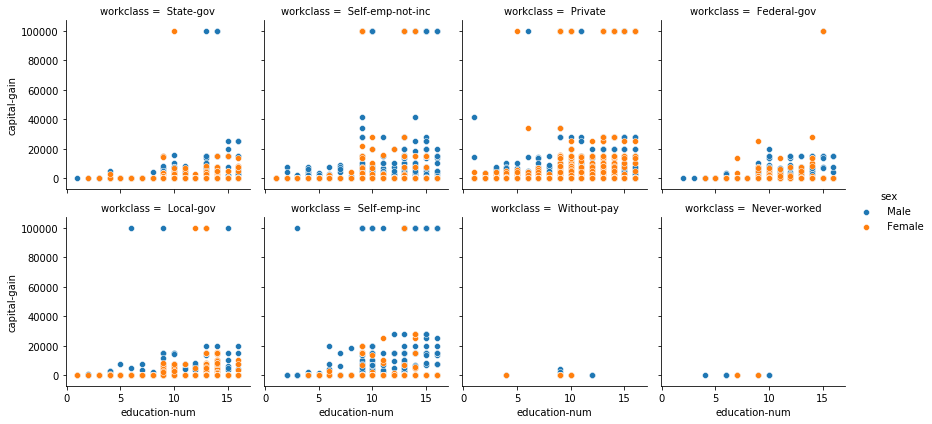

In [38]:
grid = sns.FacetGrid(df, col = "workclass", hue = "sex", col_wrap=4)
grid.map(sns.scatterplot, "education-num", "capital-gain")

grid.add_legend()

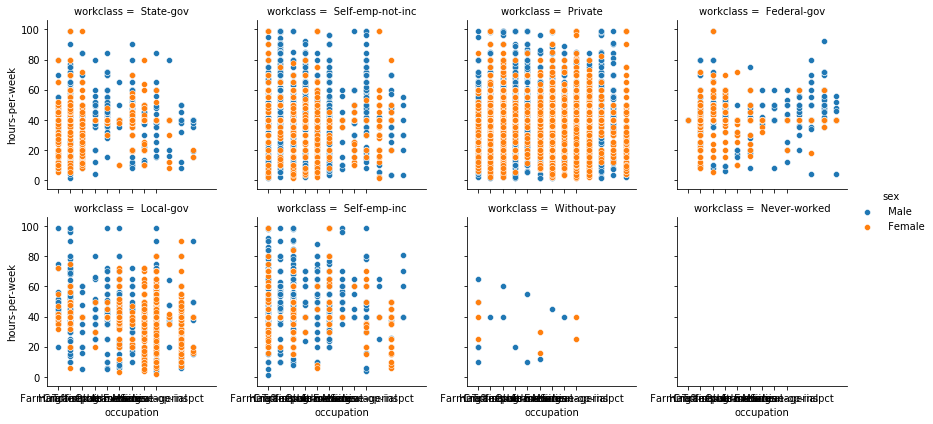

In [36]:
grid = sns.FacetGrid(df, col = "workclass", hue = "sex", col_wrap=4)
grid.map(sns.scatterplot, "occupation", "hours-per-week")

grid.add_legend()

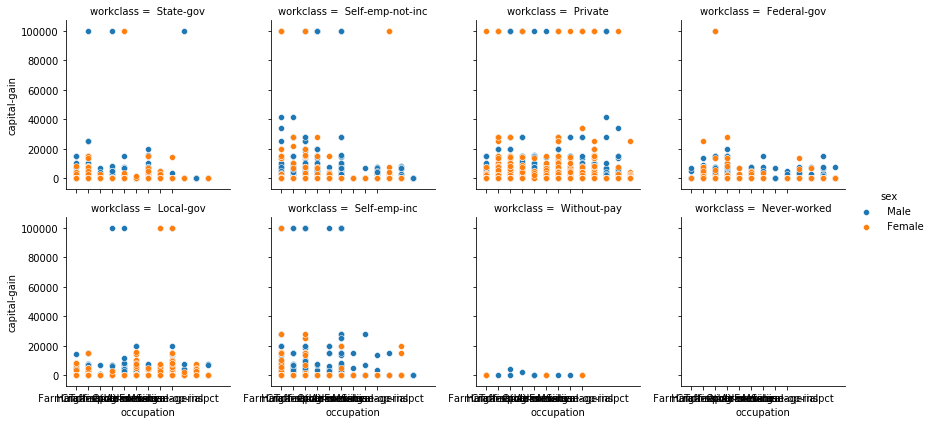

In [37]:
grid = sns.FacetGrid(df, col = "workclass", hue = "sex", col_wrap=4)
grid.map(sns.scatterplot, "occupation", "capital-gain")

grid.add_legend()

In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(shuffle=True, n_splits=5)

In [177]:
log_accuracies = cross_val_score(estimator = logreg, X = x_train, y = y_train, cv = kf)
print("Mean_XGB_Acc : ", log_accuracies.mean())

Mean_XGB_Acc :  0.8309671732662738


In [178]:
decision_tree  =DecisionTreeClassifier()
dec_acc = cross_val_score(estimator = decision_tree, X = x_train, y = y_train, cv = kf)
print("Mean_XGB_Acc : ", dec_acc.mean())

Mean_XGB_Acc :  0.7747680472038039


In [179]:
decision_tree  =RandomForestClassifier()
dec_acc = cross_val_score(estimator = decision_tree, X = x_train, y = y_train, cv = kf)
print("Mean_XGB_Acc : ", dec_acc.mean())

Mean_XGB_Acc :  0.8124512860398607


In [55]:

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 65.4min finished
C:\Users\Ali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [56]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
print (f'Accuracy - : {best_clf.score(x_test,y_test):.3f}')

Accuracy - : 0.832
